In [87]:
import pandas as pd
import numpy as np
from plotnine import *

# Rolle 2018 WRR - Exp a Scenarios 1 and 2

In [96]:
## reading results
# os.getcwd()
results = pd.read_csv('data/sprocati2019-case1.csv', sep = '\t', skipinitialspace=True)
results = results.drop([0,1])
results = results.iloc[:, :-1]

#melting
results_melted = pd.melt(results, id_vars = ['dist', 'time'])
# results.melted['scenario'] = '2'
results_melted

,dist,time,variable,value
0,0.025,0,A_i,1.000000e-96
1,0.035,0,A_i,1.000000e-96
2,0.045,0,A_i,1.000000e-96
3,0.055,0,A_i,1.000000e-96
4,0.065,0,A_i,1.000000e-96
...,...,...,...,...
6975,0.955,6,current,0.000000e+00
6976,0.965,6,current,0.000000e+00
6977,0.975,6,current,0.000000e+00
6978,0.985,6,current,0.000000e+00


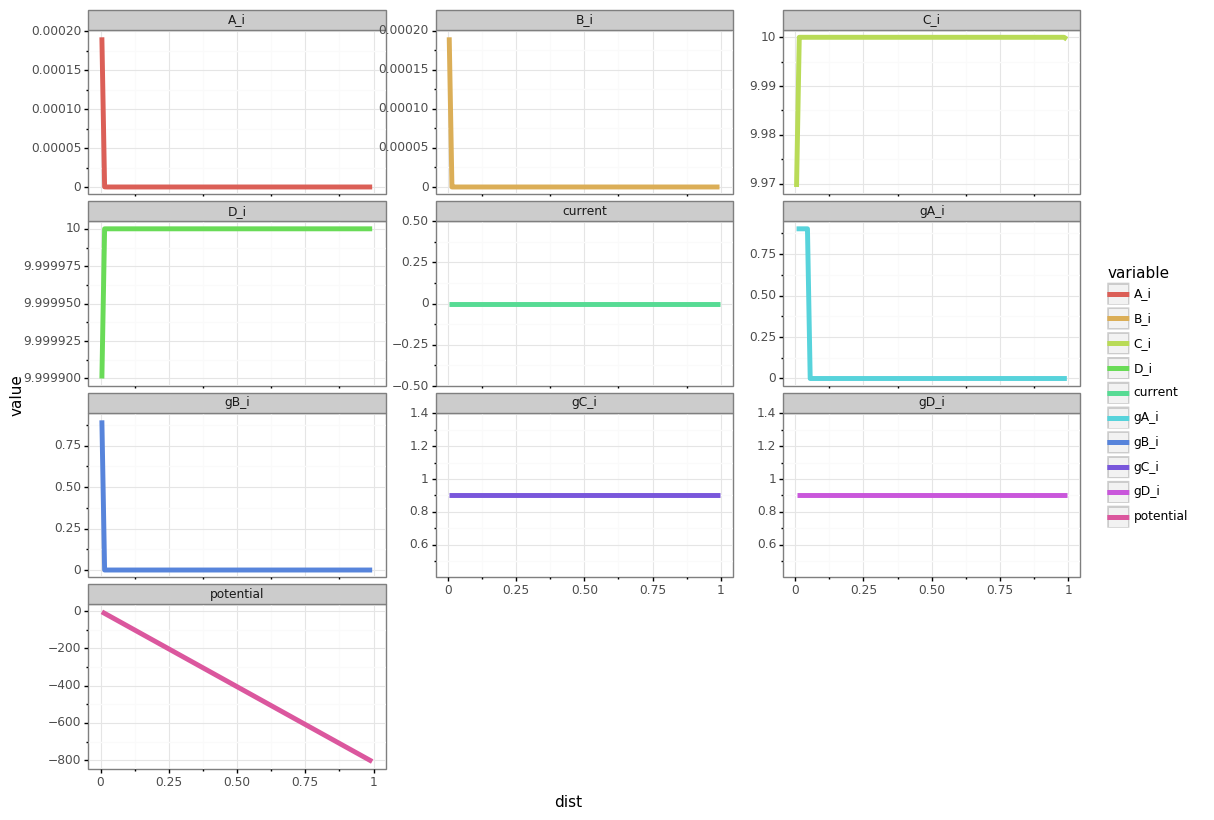

<ggplot: (-9223371919779707469)>

In [98]:
from plotnine import *

# options.figure_size = (6.4*2, 4.8*2)

(ggplot(results_melted[results_melted['time'] == 6], aes('dist', 'value', color='variable'))
 + geom_line(size = 2)
 + facet_wrap('~variable', ncol = 3, scales= 'free_y')
 + theme_bw() + theme(figure_size = (6.4*2, 4.8*2), panel_spacing_x = 0.5)
 ) 